In [960]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [961]:
df = pd.read_csv("Top_votes_movies.csv")

## This dataset represents the top 50 movies sorted by number of votes and released between 1950 and 2012

# **Dataset cleaning**

In [962]:
df.head()

,Title,Year,Director,Genre,Duration,Gross,Votes,Rating
0,The Shawshank Redemption,(1994),Frank Darabont,Drama,142 min,$28.34M,"2,777,598",9.3
1,The Dark Knight,(2008),Christopher Nolan,"Action, Crime, Drama",152 min,$534.86M,"2,754,377",9.0
2,Inception,(2010),Christopher Nolan,"Action, Adventure, Sci-Fi",148 min,$292.58M,"2,445,084",8.8
3,Fight Club,(1999),David Fincher,Drama,139 min,$37.03M,"2,213,195",8.8
4,Forrest Gump,(1994),Robert Zemeckis,"Drama, Romance",142 min,$330.25M,"2,160,221",8.8


In [963]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Title     50 non-null     object 
 1   Year      50 non-null     object 
 2   Director  50 non-null     object 
 3   Genre     50 non-null     object 
 4   Duration  50 non-null     object 
 5   Gross     50 non-null     object 
 6   Votes     50 non-null     object 
 7   Rating    50 non-null     float64
dtypes: float64(1), object(7)
memory usage: 3.2+ KB


In [964]:
# Remove () from "Year" values
df["Year"] = df["Year"].str.replace("[()]", "", regex=True)

# Change the type of "Year"
df["Year"] = pd.to_datetime(df["Year"]).dt.year

In [965]:
# Remove "$" and "M" from "Gross" field
df["Gross"] = df["Gross"].str.replace("$", "", regex=True)
df["Gross"] = df["Gross"].str.replace("M", "", regex=True)

# Rename "Gross" field
df = df.rename(columns={"Gross": "Gross ($ millions)"})

# Change the type of "Gross ($ millions)"
df["Gross ($ millions)"] = df["Gross ($ millions)"].astype(float)

In [966]:
# Remove "min" from "Duration" field
df["Duration"] = df["Duration"].str.replace("min", "")

# Rename "Duration" field
df = df.rename(columns={"Duration": "Duration (min)"})

# Change the type of "Duration (min)"
df["Duration (min)"] = df["Duration (min)"].astype(int)

In [967]:
# Remove "," from "Votes" field
df["Votes"] = df["Votes"].str.replace(",", "")

# Change the type of "Votes"
df["Votes"] = df["Votes"].astype(int)

In [968]:
df.head()

,Title,Year,Director,Genre,Duration (min),Gross ($ millions),Votes,Rating
0,The Shawshank Redemption,1994,Frank Darabont,Drama,142,28.34,2777598,9.3
1,The Dark Knight,2008,Christopher Nolan,"Action, Crime, Drama",152,534.86,2754377,9.0
2,Inception,2010,Christopher Nolan,"Action, Adventure, Sci-Fi",148,292.58,2445084,8.8
3,Fight Club,1999,David Fincher,Drama,139,37.03,2213195,8.8
4,Forrest Gump,1994,Robert Zemeckis,"Drama, Romance",142,330.25,2160221,8.8


In [969]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Title               50 non-null     object 
 1   Year                50 non-null     int64  
 2   Director            50 non-null     object 
 3   Genre               50 non-null     object 
 4   Duration (min)      50 non-null     int64  
 5   Gross ($ millions)  50 non-null     float64
 6   Votes               50 non-null     int64  
 7   Rating              50 non-null     float64
dtypes: float64(2), int64(3), object(3)
memory usage: 3.2+ KB


In [970]:
# Save the cleaned dataset
df.to_csv("Top_votes_movies_cleaned.csv")

# **Dataset analysis**

### 1. Which director has the highest number of movies in this dataset?

In [971]:
# Group by director
df_director = df.groupby("Director")["Title"].count()

# Find the director with the highest number of movies in the top 50
max_movies_director = df_director.idxmax()
print(max_movies_director, "has the highest number of movies in the top 50 movies.")

Christopher Nolan has the highest number of movies in the top 50 movies.


### 2. Which genre has the highest rating?

In [972]:
# Split the row where there are several genres

split_genre = [] # Create an empty list
for index, row in df.iterrows(): # Iterate through each row in df
    # Get the "Genre" and "Rating" values
    genre = row["Genre"]
    rating = row["Rating"]
    for genre in genre.split(", "):  # Split the "Genre" by comma and space to get individual genres
        # Create a tuple with the individual genre and the corresponding rating and append it to the "split_genres" list
        split_genre.append((genre, rating))

print(split_genre)

[('Drama', 9.3), ('Action', 9.0), ('Crime', 9.0), ('Drama', 9.0), ('Action', 8.8), ('Adventure', 8.8), ('Sci-Fi', 8.8), ('Drama', 8.8), ('Drama', 8.8), ('Romance', 8.8), ('Crime', 8.9), ('Drama', 8.9), ('Action', 8.7), ('Sci-Fi', 8.7), ('Crime', 9.2), ('Drama', 9.2), ('Action', 8.8), ('Adventure', 8.8), ('Drama', 8.8), ('Action', 9.0), ('Adventure', 9.0), ('Drama', 9.0), ('Action', 8.4), ('Drama', 8.4), ('Thriller', 8.4), ('Crime', 8.6), ('Drama', 8.6), ('Mystery', 8.6), ('Action', 8.8), ('Adventure', 8.8), ('Drama', 8.8), ('Drama', 8.4), ('Western', 8.4), ('Action', 8.5), ('Adventure', 8.5), ('Drama', 8.5), ('Action', 8.2), ('Crime', 8.2), ('Drama', 8.2), ('Adventure', 8.3), ('Drama', 8.3), ('War', 8.3), ('Crime', 8.6), ('Drama', 8.6), ('Thriller', 8.6), ('Drama', 8.6), ('War', 8.6), ('Action', 8.0), ('Sci-Fi', 8.0), ('Action', 8.6), ('Adventure', 8.6), ('Fantasy', 8.6), ('Biography', 9.0), ('Drama', 9.0), ('History', 9.0), ('Drama', 8.5), ('Mystery', 8.5), ('Sci-Fi', 8.5), ('Mystery'

In [973]:
# Create a dataframe with the genre and the corresponding rating
df_genre_rating = pd.DataFrame(split_genre, columns=["Genre", "Rating"])

# Group by genre
df_genre_rating = df_genre_rating.groupby("Genre")["Rating"].mean()

# Find the genre with the highest rating
max_rating = df_genre_rating.idxmax()

print(max_rating, "genre has the highest rating among the top 50 movies.")

Biography genre has the highest rating among the top 50 movies.


### 3. What is the gross expenditure of the lowest-rated movies as compared with the highest-rated ones?

In [974]:
# Group by rating
df_rating_gross = df.groupby("Rating")["Gross ($ millions)"].mean()

# Create a dataframe and reset index
df_rating_gross = pd.DataFrame(df_rating_gross)
df_rating_gross.reset_index(inplace=True)

# Sort the dataframe in ascending order based on the "Rating" column
df_rating_gross_sorted = df_rating_gross.sort_values(by="Rating")

# Get the first row, which corresponds to the lowest-rated movie's gross expenditure
lowest_rated_movie_gross = df_rating_gross_sorted.iloc[0]["Gross ($ millions)"]
print("The gross expenditure for the lowest-rated movie in the top 50 movies is $" + str(round(lowest_rated_movie_gross, 3)), "M.")

# Get the last row, which corresponds to the highest-rated movie's gross expenditure
highest_rated_movie_gross = df_rating_gross_sorted.iloc[-1]["Gross ($ millions)"]
print("The gross expenditure for the highest-rated movie in the top 50 movies is $" + str(round(highest_rated_movie_gross, 3)), "M.")

The gross expenditure for the lowest-rated movie in the top 50 movies is $579.417 M.
The gross expenditure for the highest-rated movie in the top 50 movies is $28.34 M.


We can see that the lowest-rated movie surprisingly had a significantly higher gross expenditure than the highest-rated movie.
To better understand the distribution of ratings and their corresponding gross expenditures, we can visualise all the rating values and compare them against their respective gross expenditure using a bar plot.

Text(0.5, 1.0, 'Analysing Movie Ratings and Gross Expenditure Relationship')

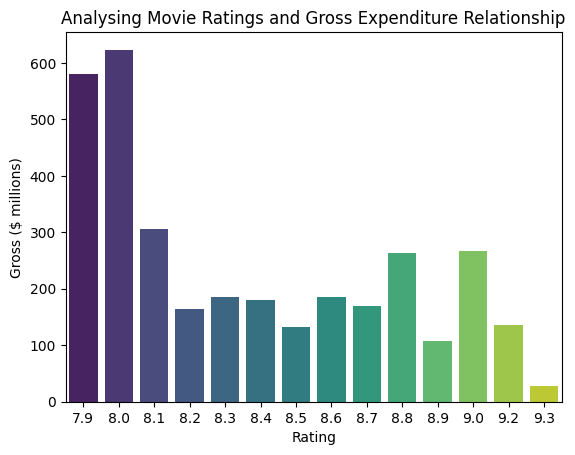

In [975]:
# Visualisation of the rating and gross

# Create the bar plot using Seaborn
sns.barplot(x=df_rating_gross["Rating"], y=df_rating_gross["Gross ($ millions)"], palette="viridis")
plt.xlabel("Rating")
plt.ylabel("Gross ($ millions)")
plt.title("Analysing Movie Ratings and Gross Expenditure Relationship")

Upon initial observation, we can see that higher movie gross don't guarantee a higher rating and there must be other factors which influence a movie's rating. The visual representation provides valuable insights into the complex relationship between gross expenditure and rating, encouraging further investigation into the diverse elements contributing to a movie's overall success and audience reception.

### 4. What is the gross expenditure of the movies with the least votes as compared with the most votes ones?

In [976]:
# Group by number of votes
df_votes_gross = df.groupby("Votes")["Gross ($ millions)"].mean()

# Create a dataframe and reset index
df_votes_gross = pd.DataFrame(df_votes_gross)
df_votes_gross.reset_index(inplace=True)

# Sort the dataframe in ascending order based on the "Votes" column
df_votes_gross_sorted = df_votes_gross.sort_values(by="Votes")

# Get the first row, which corresponds to the gross expenditure for the movie which has the lowest number of votes
lowest_votes_movie_gross = df_votes_gross_sorted.iloc[0]["Gross ($ millions)"]
print("The gross expenditure for the the movie which has the lowest number of votes in the top 50 movies is $" + str(round(lowest_votes_movie_gross, 3)), "M.")

# Get the last row, which corresponds to the gross expenditure for the movie which has the highest number of votes
highest_votes_movie_gross = df_votes_gross_sorted.iloc[-1]["Gross ($ millions)"]
print("The gross expenditure for the the movie which has the highest number of votes in the top 50 movies is $" + str(round(highest_votes_movie_gross, 3)), "M.")


The gross expenditure for the the movie which has the lowest number of votes in the top 50 movies is $44.02 M.
The gross expenditure for the the movie which has the highest number of votes in the top 50 movies is $28.34 M.


In [977]:
# Smallest and biggest numbers of votes
print(df["Votes"].iloc[-1])
print(df["Votes"].iloc[0])

1060699
2777598


In [978]:
# Create a new field "Votes group" which represents the group of number of votes
votes_group = []
for num in df["Votes"]:
    lower_bound = (num// 500000) * 500000  # Calculate the lower bound of the age group
    upper_bound = lower_bound + 500000  # Calculate the upper bound of the age group
    votes_group.append(f"{lower_bound/1000000}M - {upper_bound/1000000}M")

df["Votes group"] = votes_group

In [979]:
df.head()

,Title,Year,Director,Genre,Duration (min),Gross ($ millions),Votes,Rating,Votes group
0,The Shawshank Redemption,1994,Frank Darabont,Drama,142,28.34,2777598,9.3,2.5M - 3.0M
1,The Dark Knight,2008,Christopher Nolan,"Action, Crime, Drama",152,534.86,2754377,9.0,2.5M - 3.0M
2,Inception,2010,Christopher Nolan,"Action, Adventure, Sci-Fi",148,292.58,2445084,8.8,2.0M - 2.5M
3,Fight Club,1999,David Fincher,Drama,139,37.03,2213195,8.8,2.0M - 2.5M
4,Forrest Gump,1994,Robert Zemeckis,"Drama, Romance",142,330.25,2160221,8.8,2.0M - 2.5M


Text(0.5, 1.0, 'Analysing Movie Votes and Gross Expenditure Relationship')

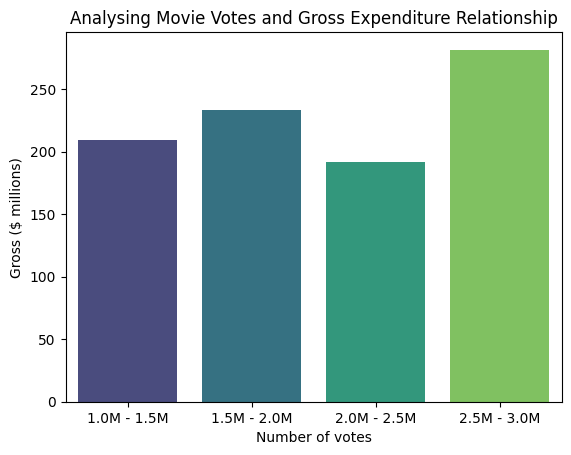

In [980]:
# Visualisation of the number of votes and gross

# Group by number of votes
df_votes_group_gross = df.groupby("Votes group")["Gross ($ millions)"].mean()

df_votes_group_gross = pd.DataFrame(df_votes_group_gross)
df_votes_group_gross.reset_index(inplace=True)

# Create the bar plot using Seaborn
sns.barplot(x=df_votes_group_gross["Votes group"], y=df_votes_group_gross["Gross ($ millions)"], palette="viridis")
plt.xlabel("Number of votes")
plt.ylabel("Gross ($ millions)")
plt.title("Analysing Movie Votes and Gross Expenditure Relationship")

Given this observation, we can see that movies with the most votes have the highest gross expenditure but the movies with a number of votes between 2 and 2.5M have the lowest gross expenditure.
There are likely other factors at play, such as the movie's genre, cast or marketing efforts for example.

To gain a more comprehensive understanding of the relationship, further analysis and exploration of potential variables are necessary. It's essential to be cautious when interpreting data and avoid making generalisations based on a single plot or observation. Additional statistical analysis and data exploration can provide more insights into the complex dynamics between the number of votes and gross expenditure for movies.